# Linear Regression using Scikit-learn

This notebook contains practice on linear regression. In most business cases, simple linear regression is all that is needed to better understand a set of data and make inferences that can help in taking calculated business decisions.

A good comprehensive explanation for linear regression is in Andrew Ng's course in Coursera: https://www.coursera.org/learn/machine-learning/home

In general, linear regression is used to get a prediction or inference of continuous data, such as the predicted salary of a particular job from a dataset of jobs, the predicted test scores of a test taker, or the predicted weight of a baby after a certain period of time.

### Import libraries needed for linear regression

In [2]:
#basic numpy, pandas, and matplotlib libraries for loading & viewing data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#train_test_split to automatically create random training & test sets
from sklearn.model_selection import train_test_split

#linearregression class to conduct linear regression
from sklearn.linear_model import LinearRegression

#metrics to measure the effectiveness of our linear regression model
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

### Import the dataset to be used.
 
In this first example, I use the salary dataset from the following Udemy course: https://www.udemy.com/course/machinelearning/

It's a great course for quick practice of modern machine learning libraries & workflows. Couple it with Andrew Ng's courses in coursera for a more comprehensive understanding of machine learning. It was very effective for me.

In [3]:
#import dataset using pandas library
#it's good to preview the dataset before hand, usually you can just open the csv file.
dataset = pd.read_csv('datasets/salary_data.csv')

#pandas stores data from csv in a DataFrame object.
#for machine learning purposes, it can be more versatile to store in a numpy array
print(type(dataset))

#store X and y labels in numpy array using values & iloc parameter from the DataFrame 
#iloc gets the corresponding data column / row. Values turns it into a numpy array.
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

#notice the notation in X and y. X is capitalized & y is not.
#X contains all columns before the last column (:-1 index). In most cases, it is a matrix/2-D array.
#y contains ground truth labels from the last column (-1 index). It is a vector array.
print(X.shape)
print(y.shape)

<class 'pandas.core.frame.DataFrame'>
(30, 1)
(30,)


### Create training and test set using train_test_split from scikit-learn

A good split between training and test set is around 20 - 30% test set, with the rest being the training set. Another way to do it is to split into three sets: training, cross-validation, and test set. This is usually done for more complicated models such as neural networks. In this instance, the split between training:cross-validation:test sets is usually 60:20:20. 

Number of training data: 24
Number of test data: 6


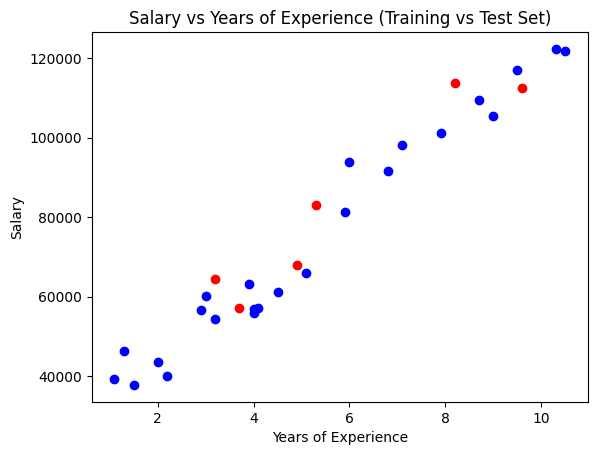

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
#test_size determines the proportion of data going into the test set
#random_state is a random number which is used for reproducibility. When running the code twice with the same random_state, you get the same split of data.

print(f'Number of training data: {y_train.size}')
print(f'Number of test data: {y_test.size}')

#plot training vs test sets in a scatterplot to visualize the data beforehand
plt.scatter(X_train,y_train,marker='o',c='b')
plt.scatter(X_test,y_test,marker='o',c='r')
plt.title('Salary vs Years of Experience (Training vs Test Set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

### Create, train, & test the linear regression model

We use the LinearRegression object from scikit-learn to create a linear regression model. This model is trained on the training set using the **fit** function and can then be tested on the test set using the **predict** function.


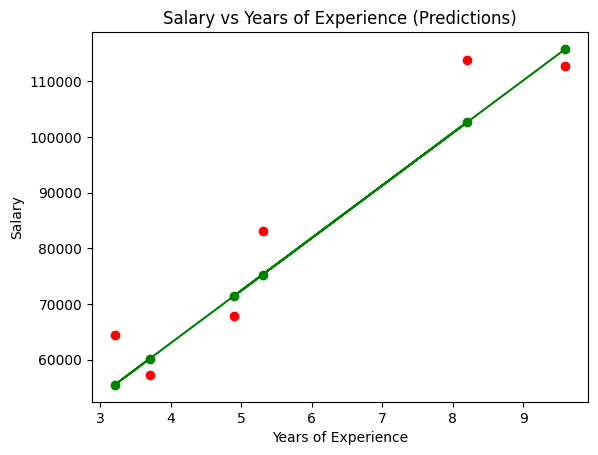

In [6]:
#initiate the model object
#LinearRegression uses the Normal equation to fit the training set: http://mlwiki.org/index.php/Normal_Equation
#SGDRegressor can be used if we want to use gradient descent method
my_model = LinearRegression()

#train the model using fit method on the training set
my_model.fit(X_train,y_train)

#get predictions from 
y_pred = my_model.predict(X_test)

#plot line, predictions vs real values
plt.scatter(X_test,y_pred,marker='o',c='g')
plt.scatter(X_test,y_test,marker='o',c='r')
plt.plot(X_test,y_pred,c='g')
plt.title('Salary vs Years of Experience (Predictions)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()


### Measure the effectiveness of the linear regression model

We can use different measures to show how effective the linear regression model is. Three measures are shown below: R-squared, Mean Squared Error (MSE), and Mean Absolute Error (MAE)

In [7]:
#calculate the r-squared score
r2 = r2_score(y_test,y_pred)
print(f'R-squared: {r2}')

#calculate the mean squared error (MSE)
mse = mean_squared_error(y_test,y_pred)
print(f'MSE: {mse}')

#calculate the mean absolute error (MAE)
mae = mean_absolute_error(y_test,y_pred)
print(f'MAE: {mae}')



R-squared: 0.9024461774180497
MSE: 49830096.85590839
MAE: 6286.453830757749
